<IPython.core.display.Javascript object>


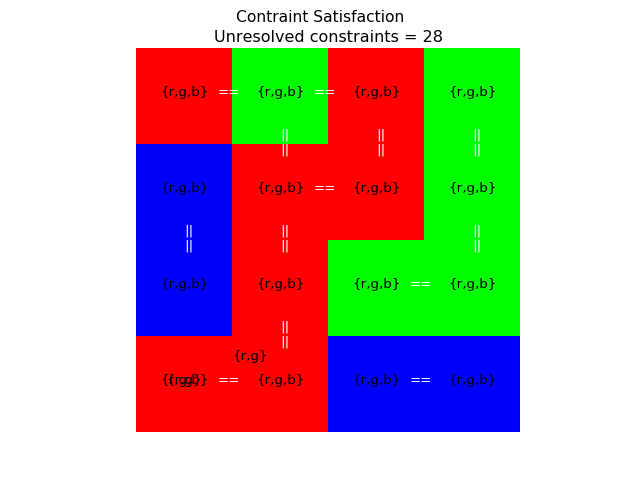

16


In [7]:
%matplotlib notebook
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
red = (255,0,0)
blue = (0,255,0)
green = (0,0,255)
white = (180,180,180)
colorList = [red,blue,green]
colors = np.zeros((4,4,3),dtype='uint8')
unresolved = 0
fig,ax = plt.subplots(1,1)
fig.suptitle('Contraint Satisfaction',fontsize=14)
# ax = fig.add_subplot(111)
txt = None
domains = np.empty(colors.shape[:2],dtype=np.object)

domains[:] = '{r,g,b}'
domainText = ax.text(0,0,'')

def drawGrid():
    global ax,domainText
    colors = np.zeros((4,4,3),dtype='uint8')
    for rowInd,row in enumerate(colors):
        for colInd,pixel in enumerate(row):
            colors[rowInd,colInd] = random.choice(colorList)
            domainText = ax.text(colInd,rowInd,domains[rowInd,colInd],horizontalalignment='center')    
    return colors
    
def checkConstraints(grid):
    for rowInd,row in enumerate(grid):
        for colInd,pixel in enumerate(row):
            try:
                if sameBelow(rowInd,colInd):
                    drawConflict(grid,'below',(rowInd+1,colInd),rowInd,colInd)
            except:
                pass
            try:
                if np.array_equal(pixel,grid[rowInd-1,colInd]):
                    drawConflict(grid,'above',(rowInd-1,colInd),rowInd,colInd)
            except:
                pass
            try:
                if np.array_equal(pixel,grid[rowInd,colInd-1]):
                    drawConflict(grid,'left',(rowInd,colInd-1),rowInd,colInd)
            except:
                pass
            try:
                if sameRight(rowInd,colInd):
                    drawConflict(grid,'right',(rowInd,colInd+1),rowInd,colInd)
            except:
                pass
    return grid

def drawConflict(grid,direction,neighbor,rowInd,colInd):
    global ax,unresolved
    if direction == 'right':        
        conflict = ax.text(colInd+0.35,rowInd,'==',color='white')
#     ax.annotate('conflict', xy=neighbor, xytext=(rowInd,colInd),
#             arrowprops=dict(facecolor='black', shrink=0.05))
#     elif direction == 'above':
#         ax.text(colInd,rowInd-0.35,'||\n||',color='white')
#     elif direction == 'left':
#         ax.text(colInd-0.35,rowInd,'==',color='white')
    elif direction == 'below':
        conflict = ax.text(colInd,rowInd+0.60,'||\n||',color='white')
    unresolved +=1    
    return conflict 

ann1 = []        
txt1 = []

def sendDomain(grid,direction,neighbor,rowInd,colInd):
    global ax,txt1,ann1
#     txt.remove()
    if direction == 'right':        
        txt2 = ax.text(colInd+0.35,rowInd,'sending right',color='white')
#         txt1.append(txt)
        an = ax.annotate('domain', xy=neighbor, xytext='text',
            arrowprops=dict(facecolor='black', shrink=0.05))
#         ann1.append(an)
#     elif direction == 'above':
#         ax.text(colInd,rowInd-0.35,'',color='white')
#     elif direction == 'left':
#         ax.text(colInd-0.35,rowInd,'==',color='white')
    elif direction == 'below':
        txt2 = ax.text(colInd,rowInd+0.60,'sending domain down',color='white')
#         txt1.append(txt)
        an = ax.annotate('domain', xy=neighbor, xytext=(rowInd,colInd),
            arrowprops=dict(facecolor='black', shrink=0.05))
        ann1.append(an)
    return txt2,an

colors = drawGrid()
colors = checkConstraints(colors)
ax.set_title('Unresolved constraints = '+ str(unresolved))
plt.axis('off')
im = ax.imshow(colors,interpolation ='none')
currRow = currCol = 0
img = []

def revise_colors(rowInd,colInd):
    pixel = colors[rowInd,colInd]
    txt2 = an = None
    try:
        if np.array_equal(pixel, colors[rowInd+1,colInd]):
            txt2, an = sendDomain(colors,'below',(rowInd+1,colInd),rowInd,colInd)
    except:
        pass
    try:
        if np.array_equal(pixel, colors[rowInd,colInd+1]):
            txt2, an = sendDomain(colors,'right',(rowInd,colInd+1),rowInd,colInd)
    except:
        pass
    return (txt2,an)
    
def sameRight(rowInd,colInd):
    pixel = colors[rowInd,colInd]    
    return np.array_equal(pixel, colors[rowInd,colInd+1])

def sameBelow(rowInd,colInd):
    pixel = colors[rowInd,colInd]
    return np.array_equal(pixel, colors[rowInd+1,colInd])

def getDomain(nodeDomain):
    domain= []
    if 'r' in nodeDomain:
        domain.append(red)
    if 'b' in nodeDomain:
        domain.append(blue)
    if 'g' in nodeDomain:
        domain.append(green)
    return domain

def diffThanLeft(currColor,rowInd,colInd):
    global colors
    nodeDomain = domains[rowInd,colInd]
    domain = getDomain(nodeDomain)
    leftColor = colors[rowInd,colInd-1]
    for color in domain:
        if not np.array_equal(color,leftColor) and not np.array_equal(color,currColor):
            colors[rowInd,colInd] = color
            return
    colors[rowInd,colInd] = white
    
    
def removeValue(rowInd,colInd):
    global colors,domains,domainText
    nodeDomain = domains[rowInd,colInd]
    nodeColor = colors[rowInd,colInd]
#     domainText = ax.text(colInd,rowInd,'',horizontalalignment='center')
    if np.array_equal(nodeColor,red):
        if 'b' in nodeDomain and 'g' in nodeDomain:
            domains[rowInd,colInd] = '{b,g}'            
            diffThanLeft(red,rowInd,colInd)
        elif 'g' in nodeDomain:
            domains[rowInd,colInd] = '{g}'
            diffThanLeft(red,rowInd,colInd)
        elif 'b' in nodeDomain:
            domains[rowInd,colInd] = '{b}'          
            diffThanLeft(red,rowInd,colInd)            
        else:
            domains[rowInd,colInd] = '{}'
            colors[rowInd,colInd] = white
    if np.array_equal(nodeColor, blue):
        if 'r' in nodeDomain and 'g' in nodeDomain:
            domains[rowInd,colInd] = '{r,g}'
            diffThanLeft(blue,rowInd,colInd)
        elif 'g' in nodeDomain:
            domains[rowInd,colInd] = '{g}'
            diffThanLeft(blue,rowInd,colInd)
        elif 'r' in nodeDomain:
            domains[rowInd,colInd] = '{r}'
            diffThanLeft(blue,rowInd,colInd)
        else:
            domains[rowInd,colInd] = '{}'
            colors[rowInd,colInd] = white            
    if np.array_equal(nodeColor, green):
        if 'r' in nodeDomain and 'b' in nodeDomain:
            domains[rowInd,colInd] = '{r,b}'
            diffThanLeft(green,rowInd,colInd)
        elif 'b' in nodeDomain:
            domains[rowInd,colInd] = '{b}'
            diffThanLeft(green, rowInd,colInd)
        elif 'r' in nodeDomain:
            domains[rowInd,colInd] = '{r}'
            diffThanLeft(green,rowInd,colInd)            
        else:
            domains[rowInd,colInd] = '{}'
            colors[rowInd,colInd] = white  
#     domainText = ax.text(colInd,rowInd,domains[rowInd,colInd],horizontalalignment='center')
        
# def redrawDomains():
#     for rowInd,row in enumerate(colors):
#         for colInd,col in enumerate(row):
#             domainText = ax.text(colInd+0.2,rowInd,domains[rowInd,colInd],horizontalalignment='center')
#     return domainText
            
def cycle(rowInd,colInd):
    t = ax.annotate('',(currCol,currRow))
    if colInd == len(colors[0]) -1:
        return t
    if sameRight(rowInd,colInd):        
        removeValue(rowInd,colInd)      
        t = ax.annotate(domains[rowInd,colInd],(colInd+0.5,rowInd-0.25))
        return t
    return t

# img.append(im)
def getDomainText(rowInd,colInd):
    domainText = ax.text(colInd,rowInd,domains[rowInd,colInd],horizontalalignment='center')
    return domainText

# Go through all the tiles.
# while unresolved:
for rowInd,row in enumerate(colors):
    for colInd,col in enumerate(row):
        im = ax.imshow(colors,interpolation ='none')
#         txt2,an = revise_colors(rowInd,colInd)
        t = cycle(rowInd,colInd)
        domainText = getDomainText(rowInd,colInd)
#         getUnresolved()
        tit = ax.set_title('Unresolved constraints = '+ str(unresolved))
        img.append([im,t,tit,domainText,ax])
#         img.append([im,txt2,an])
    
ani = animation.ArtistAnimation(fig,img,interval=600,blit=True,repeat_delay=500)
ani.save('animation.gif', writer='imagemagick', fps=30)
plt.show()
print(len(img))
